In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

In [2]:
aal = pd.read_csv("DIS.csv")
# dis = pd.read_csv("DIS.csv")
# pep = pd.read_csv("PEP.csv")

In [3]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,CMO_252,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252
0,2010-01-04,28.308467,28.526224,27.759719,27.933924,13700400,0.0,0,-0.558128,0.839117,...,NaN,0.766505,0.448580,1.605862,0.766505,0.561160,2.008884,0.766505,0.670993,2.402072
1,2010-01-05,27.933919,28.012312,27.611639,27.864237,10307700,0.0,0,-0.249470,0.844256,...,7.948158,0.400673,0.437257,1.569241,0.400673,0.551311,1.978562,0.400673,0.670157,2.405078
2,2010-01-06,27.785848,27.872951,27.594222,27.716166,10709500,0.0,0,-0.531403,0.699061,...,8.290704,0.278729,0.418094,1.508485,0.278729,0.537795,1.940368,0.278729,0.666718,2.405521
3,2010-01-07,27.672617,27.751010,27.472281,27.724878,8202100,0.0,0,0.031436,0.701006,...,7.416018,0.278729,0.421578,1.520578,0.278729,0.527724,1.903432,0.278729,0.663074,2.391623
4,2010-01-08,27.576793,27.820682,27.463560,27.768419,7657500,0.0,0,0.157047,0.686508,...,8.579874,0.357122,0.419836,1.511920,0.357122,0.523605,1.885613,0.357122,0.662066,2.384239


In [4]:
aal['Hl_pct'] = 100*(aal['High']-aal['Low'])/aal['Close']
aal['pct_change'] = 100*(aal['Close']- aal['Open'])/aal['Open']
aal1=aal.drop(['Open', 'High', 'Low'], axis=1)
aal1

,Date,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,...,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,Hl_pct,pct_change
0,2010-01-04,27.933924,13700400,0.0,0,-0.558128,0.839117,1.476705,2.508964,1.604342,...,0.448580,1.605862,0.766505,0.561160,2.008884,0.766505,0.670993,2.402072,2.743995,-1.323078
1,2010-01-05,27.864237,10307700,0.0,0,-0.249470,0.844256,1.411429,2.506194,0.311568,...,0.437257,1.569241,0.400673,0.551311,1.978562,0.400673,0.670157,2.405078,1.437947,-0.249454
2,2010-01-06,27.716166,10709500,0.0,0,-0.531403,0.699061,1.339327,2.497910,0.054552,...,0.418094,1.508485,0.278729,0.537795,1.940368,0.278729,0.666718,2.405521,1.005656,-0.250783
3,2010-01-07,27.724878,8202100,0.0,0,0.031436,0.701006,1.339871,2.479482,0.400120,...,0.421578,1.520578,0.278729,0.527724,1.903432,0.278729,0.663074,2.391623,1.005340,0.188856
4,2010-01-08,27.768419,7657500,0.0,0,0.157047,0.686508,1.338823,2.477971,0.288173,...,0.419836,1.511920,0.357122,0.523605,1.885613,0.357122,0.662066,2.384239,1.286072,0.694881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2021-07-02,177.110001,11099300,0.0,0,-0.084618,0.976356,1.010751,2.010187,0.750008,...,2.858998,1.614250,3.740005,2.992666,1.689722,3.740005,3.924921,2.216092,2.111685,-0.421680
2895,2021-07-06,173.690002,11557900,0.0,0,-1.931002,1.166406,1.044274,2.011402,-0.202186,...,3.052998,1.757728,4.889999,3.039555,1.749988,4.889999,3.935000,2.265531,2.752029,-1.736814
2896,2021-07-07,172.820007,6757300,0.0,0,-0.500890,1.174380,1.045448,2.011093,0.335898,...,3.050999,1.765420,2.330002,3.003110,1.737710,2.330002,3.934445,2.276614,1.348225,-0.023136
2897,2021-07-08,172.800003,6960100,0.0,0,-0.011575,1.111354,1.042529,2.005000,-0.856102,...,3.194000,1.848380,3.940002,3.016888,1.745884,3.940002,3.932937,2.276005,2.280094,1.539553


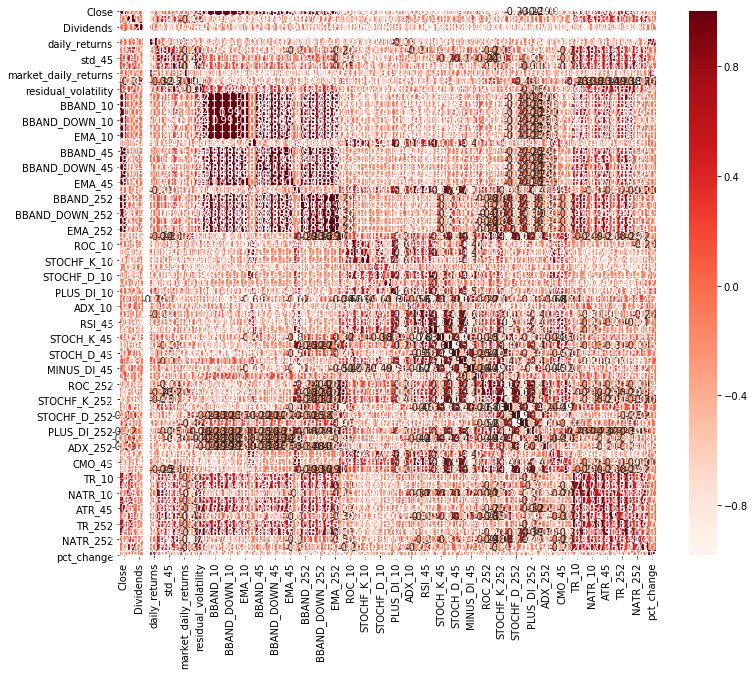

In [5]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [7]:
aal_df = aal1[rel_feat["sel_col"]]
aal_df['Date']=aal1['Date']

C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
print(len(aal1.columns), len(rel_feat))

72 30


In [9]:
aal_df.columns

Index(['Close', 'std_252', 'residual_volatility', 'Typical Price', 'BBAND_10',
       'BBAND_UP_10', 'BBAND_DOWN_10', 'SMA_10', 'EMA_10', 'BBAND_45',
       'BBAND_UP_45', 'BBAND_DOWN_45', 'SMA_45', 'EMA_45', 'BBAND_252',
       'BBAND_UP_252', 'BBAND_DOWN_252', 'SMA_252', 'EMA_252', 'STOCHF_D_252',
       'STOCH_D_252', 'PLUS_DI_252', 'MINUS_DI_252', 'ADX_252', 'TR_10',
       'ATR_10', 'TR_45', 'ATR_45', 'TR_252', 'ATR_252', 'Date'],
      dtype='object')

In [10]:
aal_close_px = aal_df['Close']

In [11]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


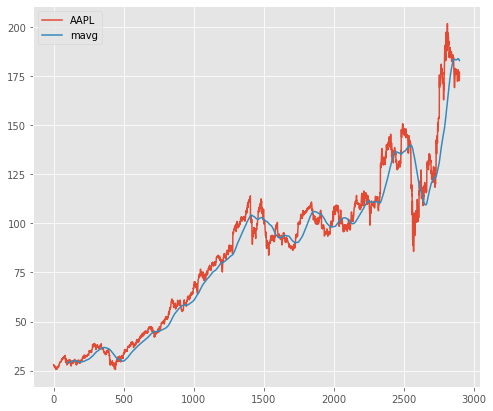

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

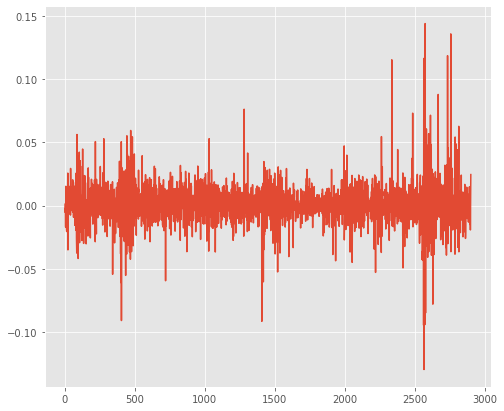

In [13]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [14]:
aal_df['prev_day'] = aal_df['Close'].shift(1)


C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
aal_df

,Close,std_252,residual_volatility,Typical Price,BBAND_10,BBAND_UP_10,BBAND_DOWN_10,SMA_10,EMA_10,BBAND_45,...,MINUS_DI_252,ADX_252,TR_10,ATR_10,TR_45,ATR_45,TR_252,ATR_252,Date,prev_day
0,27.933924,2.508964,1.695215,28.227168,28.070674,28.394306,27.747042,28.070674,27.978368,26.445574,...,18.043186,16.266487,0.766505,0.448580,0.766505,0.561160,0.766505,0.670993,2010-01-04,NaN
1,27.864237,2.506194,1.692476,28.073289,28.074158,28.386809,27.761506,28.074158,27.970288,26.526306,...,18.090914,15.878673,0.400673,0.437257,0.400673,0.551311,0.400673,0.670157,2010-01-05,27.933924
2,27.716166,2.497910,1.682841,27.829396,28.023638,28.389338,27.657938,28.023638,27.951006,26.618481,...,18.087022,15.624499,0.278729,0.418094,0.278729,0.537795,0.278729,0.666718,2010-01-06,27.864237
3,27.724878,2.479482,1.673217,27.727780,27.981829,28.380963,27.582694,27.981829,27.908307,26.710084,...,18.187681,15.486065,0.278729,0.421578,0.278729,0.527724,0.278729,0.663074,2010-01-07,27.716166
4,27.768419,2.477971,1.670595,27.649390,27.933921,28.305379,27.562463,27.933921,27.874957,26.798636,...,18.110400,15.341086,0.357122,0.419836,0.357122,0.523605,0.357122,0.662066,2010-01-08,27.724878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,177.110001,2.010187,1.802146,176.486669,175.972000,179.470684,172.473316,175.972000,176.002051,177.005999,...,20.527821,8.596539,3.740005,2.858998,3.740005,2.992666,3.740005,3.924921,2021-07-02,177.259995
2895,173.690002,2.011402,1.805632,176.696665,175.944000,179.517573,172.370427,175.944000,176.203497,176.731999,...,20.636017,8.600342,4.889999,3.052998,4.889999,3.039555,4.889999,3.935000,2021-07-06,177.110001
2896,172.820007,2.011093,1.806627,174.303335,175.876001,179.675030,172.076971,175.876001,175.746498,176.449999,...,20.580227,8.601817,2.330002,3.050999,2.330002,3.003110,2.330002,3.934445,2021-07-07,173.690002
2897,172.800003,2.005000,1.801424,173.043340,175.623001,179.891593,171.354410,175.623001,175.214408,176.195555,...,20.726378,8.603057,3.940002,3.194000,3.940002,3.016888,3.940002,3.932937,2021-07-08,172.820007


In [16]:
aal_df = aal_df.set_index("Date")

In [17]:
aal_df.index = pd.to_datetime(aal_df.index)
aal_df.index[0]

Timestamp('2010-01-04 00:00:00')

In [18]:
# training test split
key = pd.Timestamp(2016, 12, 29)
key2 = pd.Timestamp(2019, 12, 31)

train = aal_df[aal_df.index<=key].copy()
test = aal_df[(aal_df.index<=key2) & (aal_df.index>key)].copy()
col = set(train.columns)
col.remove("Close")
xtrain = train[col]
ytrain = train["Close"]
xtest = test[col]
ytest = test["Close"]

In [19]:
# # predicting stock prices, feature engineering

# aal_dfreg = aal[['Close', 'Volume']]
# aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
# aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0
# aal_dfreg

In [20]:
# import math
# from sklearn import preprocessing
# # Drop missing value
# aal_df.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(aal_df)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Close'
# aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
# X = np.array(aal_dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(aal_dfreg['label'])
# y = y[:-forecast_out]

In [21]:
# model generation
xtrain.fillna(value=-99999, inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

C:\Users\Kinjal\Anaconda3\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [22]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(xtrain, ytrain)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(xtrain, ytrain)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(xtrain, ytrain)

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [23]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [24]:
confidencereg = clfreg.score(xtest, ytest)
confidencepoly2 = clfpoly2.score(xtest,ytest)
confidencepoly3 = clfpoly3.score(xtest,ytest)
confidenceknn = clfknn.score(xtest, ytest)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.9898934626939474
The quadratic regression 2 confidence is  0.081791317055527
The quadratic regression 3 confidence is  -1.532271044373927
The knn regression confidence is  -0.4733757288788545


In [25]:
forecast_set = clfreg.predict(xtest)
aal_df['Forecast'] = np.nan

In [26]:
forecast_set
aal_df['Forecast']

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
              ..
2021-07-02   NaN
2021-07-06   NaN
2021-07-07   NaN
2021-07-08   NaN
2021-07-09   NaN
Name: Forecast, Length: 2899, dtype: float64

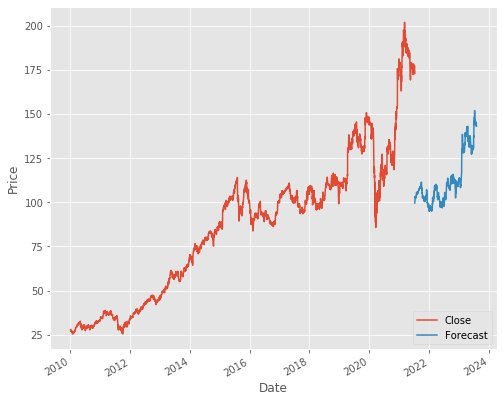

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-07-30    143.733362
2023-07-31    143.967200
2023-08-01    144.481347
2023-08-02    144.215841
2023-08-03    143.045339
Name: Forecast, Length: 3654, dtype: float64

In [27]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = aal_df.iloc[-1].name
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    aal_df.loc[next_date] = [np.nan for _ in range(len(aal_df.columns)-1)]+[i]
aal_df['Close'].plot()
aal_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
aal_df['Forecast']

In [28]:
print(next_unix)

2023-08-04 00:00:00


In [29]:
print(clfreg.coef_)

[-2.60508468e+00  3.89171692e-02  9.93743117e-01  2.75077475e-02
  3.57159239e-02  4.25893631e-01  1.50688510e-01 -8.55896587e-03
  3.01018864e-02 -2.42465065e-01  9.47439057e-03  2.42271962e-01
  4.13299614e-02  4.93961167e-06 -1.94039885e+00 -7.88405632e-02
 -7.88405632e-02  2.43417414e-06 -2.98299351e+00  3.57159239e-02
  4.80816149e-03  4.56896577e-01  7.44112166e-02 -7.88405632e-02
  4.51013333e-01  9.47439058e-03  4.25893631e-01  3.94890686e-01
  2.60836478e+00 -3.14863030e-07]


In [30]:
print(clfreg.intercept_)

-1.1887498871178508


In [31]:
xtrain.columns

Index(['ATR_252', 'EMA_252', 'Typical Price', 'BBAND_DOWN_45', 'SMA_252',
       'SMA_10', 'ATR_45', 'BBAND_UP_45', 'BBAND_UP_252', 'MINUS_DI_252',
       'SMA_45', 'PLUS_DI_252', 'BBAND_DOWN_252', 'prev_day', 'EMA_10',
       'TR_252', 'TR_45', 'STOCHF_D_252', 'residual_volatility', 'BBAND_252',
       'ADX_252', 'BBAND_UP_10', 'EMA_45', 'TR_10', 'ATR_10', 'BBAND_45',
       'BBAND_10', 'BBAND_DOWN_10', 'std_252', 'STOCH_D_252'],
      dtype='object')

In [32]:
coeff = dict(zip(xtrain.columns, clfreg.coef_))


In [33]:
coeff

{'ATR_252': -2.60508468194563,
 'EMA_252': 0.03891716920539027,
 'Typical Price': 0.9937431172092752,
 'BBAND_DOWN_45': 0.027507747546782226,
 'SMA_252': 0.035715923895956056,
 'SMA_10': 0.42589363139893277,
 'ATR_45': 0.15068850963459232,
 'BBAND_UP_45': -0.008558965869614965,
 'BBAND_UP_252': 0.0301018864329024,
 'MINUS_DI_252': -0.242465064915323,
 'SMA_45': 0.009474390570916072,
 'PLUS_DI_252': 0.2422719622324307,
 'BBAND_DOWN_252': 0.04132996135641754,
 'prev_day': 4.939611665407229e-06,
 'EMA_10': -1.9403988484624843,
 'TR_252': -0.07884056315267679,
 'TR_45': -0.07884056315222494,
 'STOCHF_D_252': 2.4341741390415616e-06,
 'residual_volatility': -2.982993510206839,
 'BBAND_252': 0.03571592388632759,
 'ADX_252': 0.004808161491817327,
 'BBAND_UP_10': 0.45689657656598953,
 'EMA_45': 0.07441121662660515,
 'TR_10': -0.07884056315215558,
 'ATR_10': 0.4510133332599332,
 'BBAND_45': 0.009474390583501162,
 'BBAND_10': 0.42589363139397723,
 'BBAND_DOWN_10': 0.3948906861840954,
 'std_252': 

In [34]:
dict(sorted(coeff.items(), key=lambda item: item[1]))

{'residual_volatility': -2.982993510206839,
 'ATR_252': -2.60508468194563,
 'EMA_10': -1.9403988484624843,
 'MINUS_DI_252': -0.242465064915323,
 'TR_252': -0.07884056315267679,
 'TR_45': -0.07884056315222494,
 'TR_10': -0.07884056315215558,
 'BBAND_UP_45': -0.008558965869614965,
 'STOCH_D_252': -3.1486303021031355e-07,
 'STOCHF_D_252': 2.4341741390415616e-06,
 'prev_day': 4.939611665407229e-06,
 'ADX_252': 0.004808161491817327,
 'SMA_45': 0.009474390570916072,
 'BBAND_45': 0.009474390583501162,
 'BBAND_DOWN_45': 0.027507747546782226,
 'BBAND_UP_252': 0.0301018864329024,
 'BBAND_252': 0.03571592388632759,
 'SMA_252': 0.035715923895956056,
 'EMA_252': 0.03891716920539027,
 'BBAND_DOWN_252': 0.04132996135641754,
 'EMA_45': 0.07441121662660515,
 'ATR_45': 0.15068850963459232,
 'PLUS_DI_252': 0.2422719622324307,
 'BBAND_DOWN_10': 0.3948906861840954,
 'BBAND_10': 0.42589363139397723,
 'SMA_10': 0.42589363139893277,
 'ATR_10': 0.4510133332599332,
 'BBAND_UP_10': 0.45689657656598953,
 'Typical